In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [14]:
print(os.listdir('D:\Dataset_KDD'))

['data', 'kddcup.data_10_percent.gz', 'kddcup.names.txt', 'training_attack_types.txt']


In [15]:
with open("D:/Dataset_KDD/kddcup.names.txt",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [16]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [17]:
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']


In [18]:
with open("D:/Dataset_KDD/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [19]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [20]:
path = "D:/Dataset_KDD/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [21]:
df.shape

(494021, 43)

In [22]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [23]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
# df.mean()

In [ ]:
# df.std()

In [24]:
%matplotlib inline

<AxesSubplot:xlabel='src_bytes', ylabel='dst_bytes'>

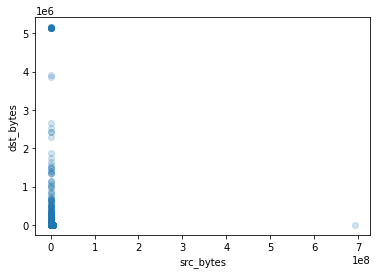

In [28]:
sns.regplot(x = "src_bytes", y="dst_bytes", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='logged_in', ylabel='num_failed_logins'>

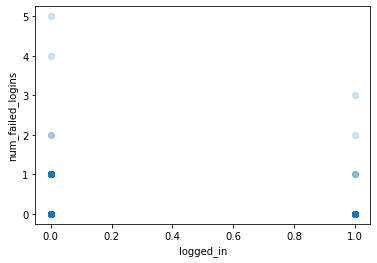

In [31]:
sns.regplot(x = "logged_in", y="num_failed_logins", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='protocol_type', ylabel='flag'>

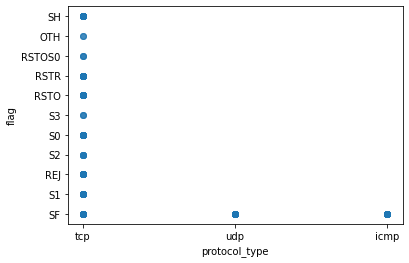

In [33]:
sns.regplot(x = "protocol_type", y="flag", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='duration', ylabel='flag'>

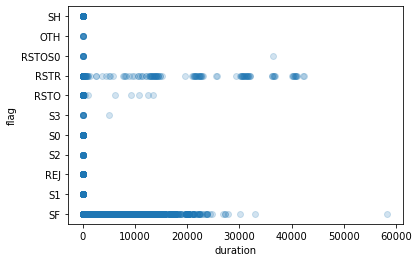

In [35]:
sns.regplot(x = "duration", y="flag", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='hot', ylabel='num_failed_logins'>

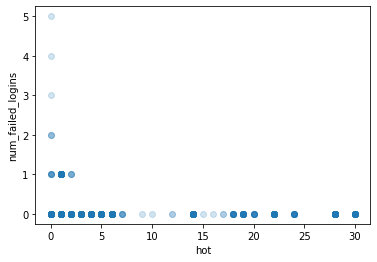

In [36]:
sns.regplot(x = "hot", y="num_failed_logins", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='dst_host_same_srv_rate', ylabel='dst_host_diff_srv_rate'>

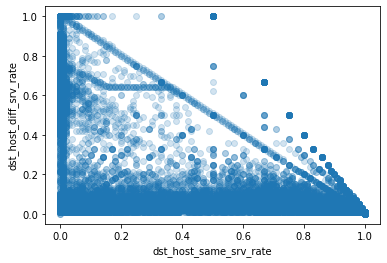

In [30]:
sns.regplot(x = "dst_host_same_srv_rate", y="dst_host_diff_srv_rate", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

In [ ]:
# 1. For each data example O, calculate the k-distance is the nearest neighborhood (where all points in a k-distance
#    forms sphere).

def distance(p):
    return np.sqrt(np.sum((p - data) ** 2, axis=1))


def k_distance_neighbor(p, k):
    dis = distance(p)                        # wyliczanie odległości
    idx = np.argsort(dis)                    # sortowanie
    for i in range(k + 1, len(idx)):
        if dis[idx[i]] <= dis[idx[i - 1]]:
            i += 1
        else:
            break
    idx = idx[1:i]
    return idx, dis[idx]


# 2. Next, calculate the reachability distance for every data example O with respect to data example p as: 
#    reachdistance (O,p) = max{k-distance (p), d(O,p)}, where d(O,p) is the distance between data example O and data example p.

def local_outlier_factor(k, threshold):
    if k >= len(data):
        print('Wrong k!')
        exit()

    # get k neighbor index and distance
    global kdn, dis
    for i, d in enumerate(data):
        idx, distance = k_distance_neighbor(d, k)
        # index shows the order of k neighbors
        kdn.append(idx)
        # distance shows the distance of k neighbors
        dis.append(distance)


# 3. Then, calculate local reachability density (LRD) for each data example O , inverse of the average reachability distance
#    is based on the MinPts (minimum number of objects) data example O and its nearest neighbors.

def local_reachability_density(index):
    rd = 0.
    for i in range(len(kdn[index])):
        rd += max(dis[index][i], dis[kdn[index][i]][-1])
    return len(kdn[index]) * 1.0 / rd


# 4. Calculate NOF or LOF(Local Outlier Factor) to all data example O as an average of the data example O’s local reachability 
#    density ratios and local reachability density of O’s MinPts nearest neighbors.

    global lof
    for i in range(len(data)):
        lof[i] = np.sum(lrd[kdn[i]]) * 1.0 / len(kdn[i]) / lrd[i]

    normal = lof < threshold
    outliers = lof >= threshold
    return normal, outliers



AttributeError: 'dict' object has no attribute 'local_outlier_factor'

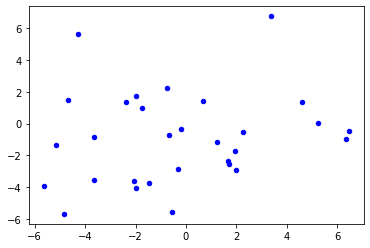

In [42]:
from matplotlib import pyplot as p

x,y = zip(*instances)
p.scatter(x,y, 20, color="#0000FF")

for instance in [[0,0],[5,5],[10,10],[-8,-8]]:
    value = lof.local_outlier_factor(3, instance)
    color = "#FF0000" if value > 1 else "#00FF00"
    p.scatter(instance[0], instance[1], color=color, s=(value-1)**2*10+20)

p.show()